In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

/bin/bash: line 1: matplotlib: command not found


In [2]:
#loading the dataset
df=pd.read_excel('Group Project Data-SFD Data-Toronto Police.xlsx')
df.head()

X          Y  OBJECTID EVENT_UNIQUE_ID                OCC_DATE  \
0 -79.234955  43.781528         1   GO-2004397105  2004/05/15 04:00:00+00   
1 -79.618218  43.733547         2   GO-2004600109  2004/07/26 04:00:00+00   
2 -79.518759  43.769157         3   GO-2004311851  2004/05/14 04:00:00+00   
3 -79.378870  43.660665         4   GO-2004736004  2004/12/19 05:00:00+00   
4 -79.212435  43.812075         5   GO-2004303455  2004/04/12 04:00:00+00   

   OCC_YEAR OCC_MONTH   OCC_DOW  OCC_DOY  OCC_DAY  OCC_HOUR OCC_TIME_RANGE  \
0      2004       May  Saturday      136       15         1          Night   
1      2004      July    Monday      208       26        23        Evening   
2      2004       May    Friday      135       14        16      Afternoon   
3      2004  December    Sunday      354       19         0          Night   
4      2004     April    Monday      103       12        22        Evening   

  DIVISION  DEATH  INJURIES HOOD_158       NEIGHBOURHOOD_158 HOOD_140  \
0      D41      0         0      142            Woburn North      137   
1      D23      0         0        1  West Humber-Clairville        1   
2      D31      1         1       24             Black Creek       24   
3      D51      1         0      168     Downtown Yonge East       75   
4      D42      0         0      146            Malvern East      132   

            NEIGHBOURHOOD_140  LONG_WGS84  LAT_WGS84  
0                Woburn (137)  -79.234955  43.781528  
1  West Humber-Clairville (1)  -79.618218  43.733547  
2            Black Creek (24)  -79.518759  43.769157  
3  Church-Yonge Corridor (75)  -79.378870  43.660665  
4               Malvern (132)  -79.212435  43.812075

# Data Cleaning

First, we are need to look if there is any missing data in the dataset.

In [3]:
#Missing Percentage
missing_percent= df.isnull().sum()*100/len(df)
missing_values=pd.DataFrame({'missing_percent':missing_percent})
missing_values=missing_values.sort_values('missing_percent')
#missing_values=missing_values.drop['X']
missing_values

missing_percent
X                              0.0
NEIGHBOURHOOD_140              0.0
HOOD_140                       0.0
NEIGHBOURHOOD_158              0.0
HOOD_158                       0.0
INJURIES                       0.0
DEATH                          0.0
DIVISION                       0.0
OCC_TIME_RANGE                 0.0
LONG_WGS84                     0.0
OCC_HOUR                       0.0
OCC_DOY                        0.0
OCC_DOW                        0.0
OCC_MONTH                      0.0
OCC_YEAR                       0.0
OCC_DATE                       0.0
EVENT_UNIQUE_ID                0.0
OBJECTID                       0.0
Y                              0.0
OCC_DAY                        0.0
LAT_WGS84                      0.0

It means there is no missing data in this dataset.

The columns names seem hard to understand. So, let's rename them properly.However, before rename the columns, there is one more thing to do which is to drop unnecessary columns.

In [4]:
#date set columns
df.columns

Index(['X', 'Y', 'OBJECTID', 'EVENT_UNIQUE_ID', 'OCC_DATE', 'OCC_YEAR',
       'OCC_MONTH', 'OCC_DOW', 'OCC_DOY', 'OCC_DAY', 'OCC_HOUR',
       'OCC_TIME_RANGE', 'DIVISION', 'DEATH', 'INJURIES', 'HOOD_158',
       'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84',
       'LAT_WGS84'],
      dtype='object')

In [5]:
df.head()

X          Y  OBJECTID EVENT_UNIQUE_ID                OCC_DATE  \
0 -79.234955  43.781528         1   GO-2004397105  2004/05/15 04:00:00+00   
1 -79.618218  43.733547         2   GO-2004600109  2004/07/26 04:00:00+00   
2 -79.518759  43.769157         3   GO-2004311851  2004/05/14 04:00:00+00   
3 -79.378870  43.660665         4   GO-2004736004  2004/12/19 05:00:00+00   
4 -79.212435  43.812075         5   GO-2004303455  2004/04/12 04:00:00+00   

   OCC_YEAR OCC_MONTH   OCC_DOW  OCC_DOY  OCC_DAY  OCC_HOUR OCC_TIME_RANGE  \
0      2004       May  Saturday      136       15         1          Night   
1      2004      July    Monday      208       26        23        Evening   
2      2004       May    Friday      135       14        16      Afternoon   
3      2004  December    Sunday      354       19         0          Night   
4      2004     April    Monday      103       12        22        Evening   

  DIVISION  DEATH  INJURIES HOOD_158       NEIGHBOURHOOD_158 HOOD_140  \
0      D41      0         0      142            Woburn North      137   
1      D23      0         0        1  West Humber-Clairville        1   
2      D31      1         1       24             Black Creek       24   
3      D51      1         0      168     Downtown Yonge East       75   
4      D42      0         0      146            Malvern East      132   

            NEIGHBOURHOOD_140  LONG_WGS84  LAT_WGS84  
0                Woburn (137)  -79.234955  43.781528  
1  West Humber-Clairville (1)  -79.618218  43.733547  
2            Black Creek (24)  -79.518759  43.769157  
3  Church-Yonge Corridor (75)  -79.378870  43.660665  
4               Malvern (132)  -79.212435  43.812075

Columns like X, Y, Object ID, Event Unique ID, OCC DATE, OCC Doy should be removed because for X and Y columns we have their alternate columns like Long_WGS84 and LAT_WGS84. Object ID, Event Unique ID AND OCC Doy columns have no use at all for anything, and we don't need OCC date either since we already have hour, Day, week, month, and year of the event or crime occurance which we can use them more effectively for analysis. Columns Like Hood_158, Hood_140, and Neighbourhood_140 which are also repeated should be removed from dataset.

In [6]:
#drop or removing unnecessary columns
df=df.drop(['X', 'Y','OBJECTID', 'EVENT_UNIQUE_ID', 'OCC_DOY', 'HOOD_158', 'HOOD_140','NEIGHBOURHOOD_140' ], axis=1)
df.head()

OCC_DATE  OCC_YEAR OCC_MONTH   OCC_DOW  OCC_DAY  OCC_HOUR  \
0  2004/05/15 04:00:00+00      2004       May  Saturday       15         1   
1  2004/07/26 04:00:00+00      2004      July    Monday       26        23   
2  2004/05/14 04:00:00+00      2004       May    Friday       14        16   
3  2004/12/19 05:00:00+00      2004  December    Sunday       19         0   
4  2004/04/12 04:00:00+00      2004     April    Monday       12        22   

  OCC_TIME_RANGE DIVISION  DEATH  INJURIES       NEIGHBOURHOOD_158  \
0          Night      D41      0         0            Woburn North   
1        Evening      D23      0         0  West Humber-Clairville   
2      Afternoon      D31      1         1             Black Creek   
3          Night      D51      1         0     Downtown Yonge East   
4        Evening      D42      0         0            Malvern East   

   LONG_WGS84  LAT_WGS84  
0  -79.234955  43.781528  
1  -79.618218  43.733547  
2  -79.518759  43.769157  
3  -79.378870  43.660665  
4  -79.212435  43.812075

In [7]:
#renaming columns
df.columns=['Occ_Date', 'Year', 'Month', 'Weekdays', 'Day_of_the_month', 'Hour',
       'Time', 'Division', 'Number_of_Death', 'Number_of_Injuries', 'Neighbourhood',
       'Longitude', 'Latitude']
df.head()

Occ_Date  Year     Month  Weekdays  Day_of_the_month  Hour  \
0  2004/05/15 04:00:00+00  2004       May  Saturday                15     1   
1  2004/07/26 04:00:00+00  2004      July    Monday                26    23   
2  2004/05/14 04:00:00+00  2004       May    Friday                14    16   
3  2004/12/19 05:00:00+00  2004  December    Sunday                19     0   
4  2004/04/12 04:00:00+00  2004     April    Monday                12    22   

        Time Division  Number_of_Death  Number_of_Injuries  \
0      Night      D41                0                   0   
1    Evening      D23                0                   0   
2  Afternoon      D31                1                   1   
3      Night      D51                1                   0   
4    Evening      D42                0                   0   

            Neighbourhood  Longitude   Latitude  
0            Woburn North -79.234955  43.781528  
1  West Humber-Clairville -79.618218  43.733547  
2             Black Creek -79.518759  43.769157  
3     Downtown Yonge East -79.378870  43.660665  
4            Malvern East -79.212435  43.812075

In [8]:
df['Occ_Date']=pd.to_datetime(df['Occ_Date'])

df.head()

Occ_Date  Year     Month  Weekdays  Day_of_the_month  Hour  \
0 2004-05-15 04:00:00+00:00  2004       May  Saturday                15     1   
1 2004-07-26 04:00:00+00:00  2004      July    Monday                26    23   
2 2004-05-14 04:00:00+00:00  2004       May    Friday                14    16   
3 2004-12-19 05:00:00+00:00  2004  December    Sunday                19     0   
4 2004-04-12 04:00:00+00:00  2004     April    Monday                12    22   

        Time Division  Number_of_Death  Number_of_Injuries  \
0      Night      D41                0                   0   
1    Evening      D23                0                   0   
2  Afternoon      D31                1                   1   
3      Night      D51                1                   0   
4    Evening      D42                0                   0   

            Neighbourhood  Longitude   Latitude  
0            Woburn North -79.234955  43.781528  
1  West Humber-Clairville -79.618218  43.733547  
2             Black Creek -79.518759  43.769157  
3     Downtown Yonge East -79.378870  43.660665  
4            Malvern East -79.212435  43.812075

In [9]:
df['Hour'],df['Date']= df['Occ_Date'].apply(lambda x:x.time()), df['Occ_Date'].apply(lambda x:x.date())
df=df.drop(['Occ_Date', 'Hour'], axis=1)
df['Date']=pd.to_datetime(df['Date'])
df.head()

Year     Month  Weekdays  Day_of_the_month       Time Division  \
0  2004       May  Saturday                15      Night      D41   
1  2004      July    Monday                26    Evening      D23   
2  2004       May    Friday                14  Afternoon      D31   
3  2004  December    Sunday                19      Night      D51   
4  2004     April    Monday                12    Evening      D42   

   Number_of_Death  Number_of_Injuries           Neighbourhood  Longitude  \
0                0                   0            Woburn North -79.234955   
1                0                   0  West Humber-Clairville -79.618218   
2                1                   1             Black Creek -79.518759   
3                1                   0     Downtown Yonge East -79.378870   
4                0                   0            Malvern East -79.212435   

    Latitude       Date  
0  43.781528 2004-05-15  
1  43.733547 2004-07-26  
2  43.769157 2004-05-14  
3  43.660665 2004-12-19  
4  43.812075 2004-04-12

Now our dataset is ready for Exploratory Analysis. First, let's look at the crime rate based on neighbourhood in Toronto.

In [10]:
df_neighbourhood=df[['Neighbourhood']].value_counts().to_frame()
df_neighbourhood=df_neighbourhood.reset_index()
df_neighbourhood.columns=['Neighbourhood', 'Crimes']
df_neighbourhood.head()

Neighbourhood  Crimes
0             Glenfield-Jane Heights     311
1                        Black Creek     203
2  Mount Olive-Silverstone-Jamestown     192
3             West Humber-Clairville     132
4            York University Heights     117

In [11]:
df_neighbourhood.tail()

Neighbourhood  Crimes
154    Forest Hill North       3
155       Kingsway South       2
156  Lawrence Park South       1
157  Lawrence Park North       1
158    Forest Hill South       1

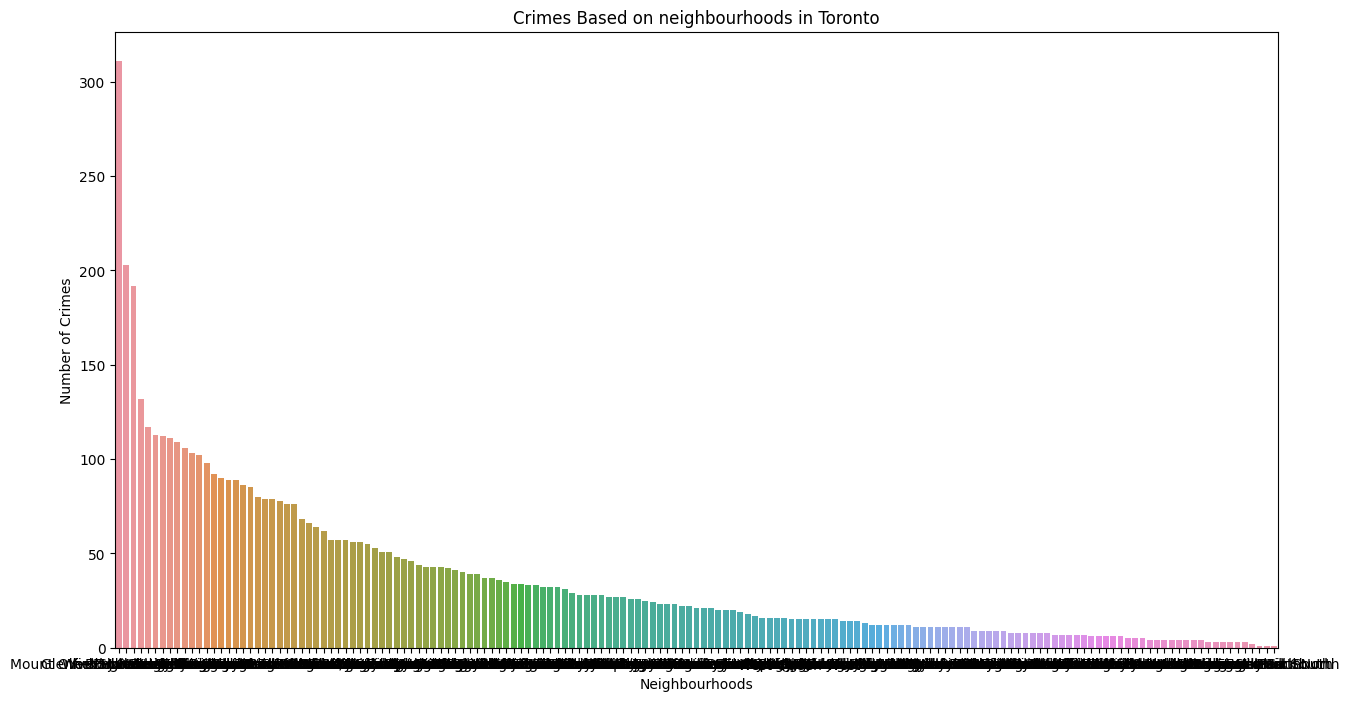

In [12]:
#Neighbourhodo barchart
plt.figure(figsize=(15, 8)) #figure size
sns.barplot(x=df_neighbourhood.Neighbourhood, y=df_neighbourhood.Crimes)
plt.xlabel('Neighbourhoods')
plt.ylabel('Number of Crimes')
plt.title('Crimes Based on neighbourhoods in Toronto')
plt.show()

It seems like it is hard to get anything from this barchart because there is so many neighbourhourhoods. So, let's just select the top 20 neighrbouhoods with the highest crimes rates.

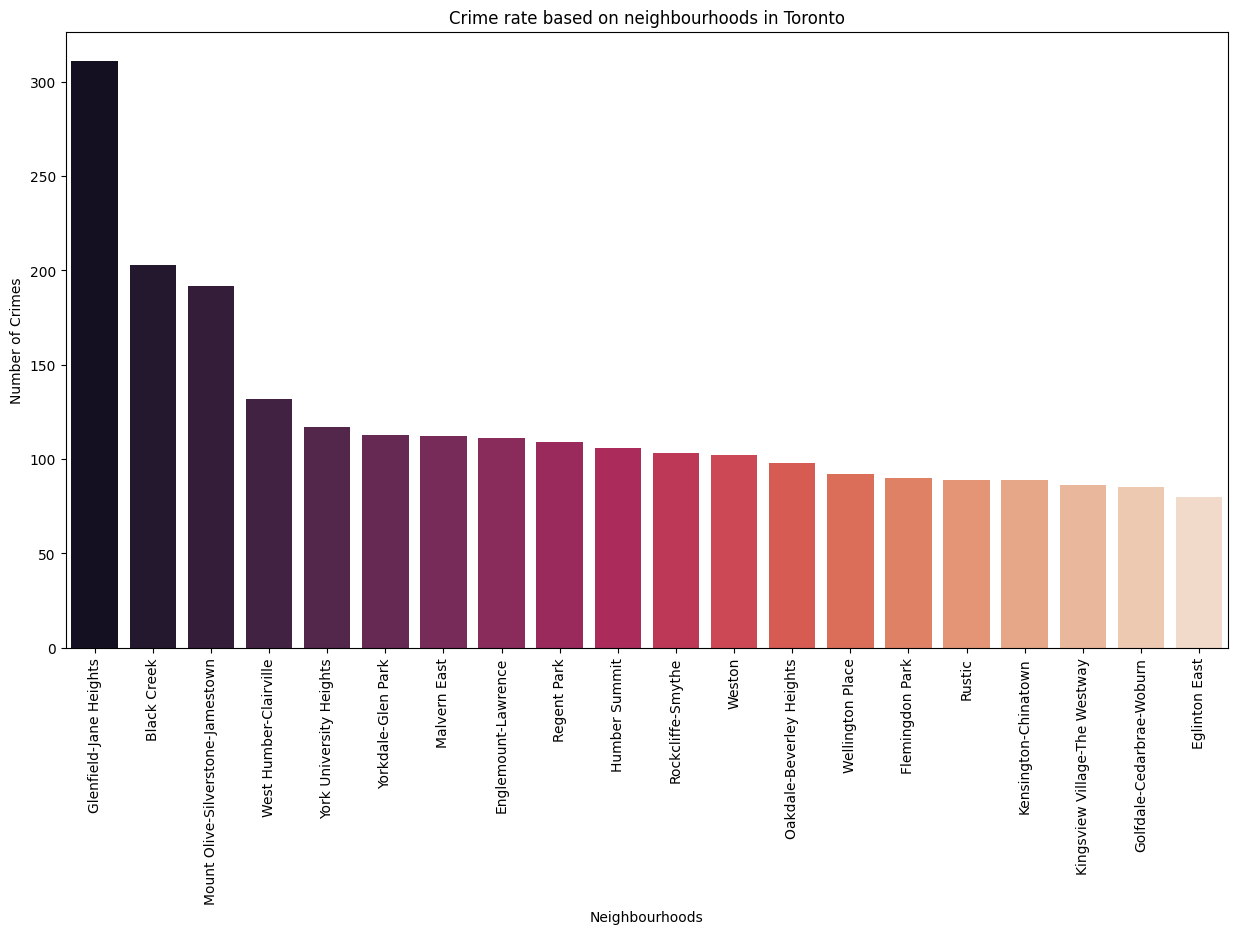

<Figure size 640x480 with 0 Axes>

In [13]:
df_neighbourhood_top=df[['Neighbourhood']].value_counts().head(20)
df_neighbourhood_top=df_neighbourhood_top.reset_index()
df_neighbourhood_top.columns=['Neighbourhood', 'Crimes']
plt.figure(figsize=(15, 8)) #figure size
#sns.set(font_scale=1)
sns.barplot(x=df_neighbourhood_top.Neighbourhood, y=df_neighbourhood_top.Crimes, palette='rocket')
plt.xlabel('Neighbourhoods')
plt.ylabel('Number of Crimes')
plt.title('Crime rate based on neighbourhoods in Toronto')
plt.xticks(rotation=90)
plt.show()
plt.savefig('neighrbourhood crimes rates')

Now we can take a look at the crime rate of top ten neighbourhoods based on the years after 2010.

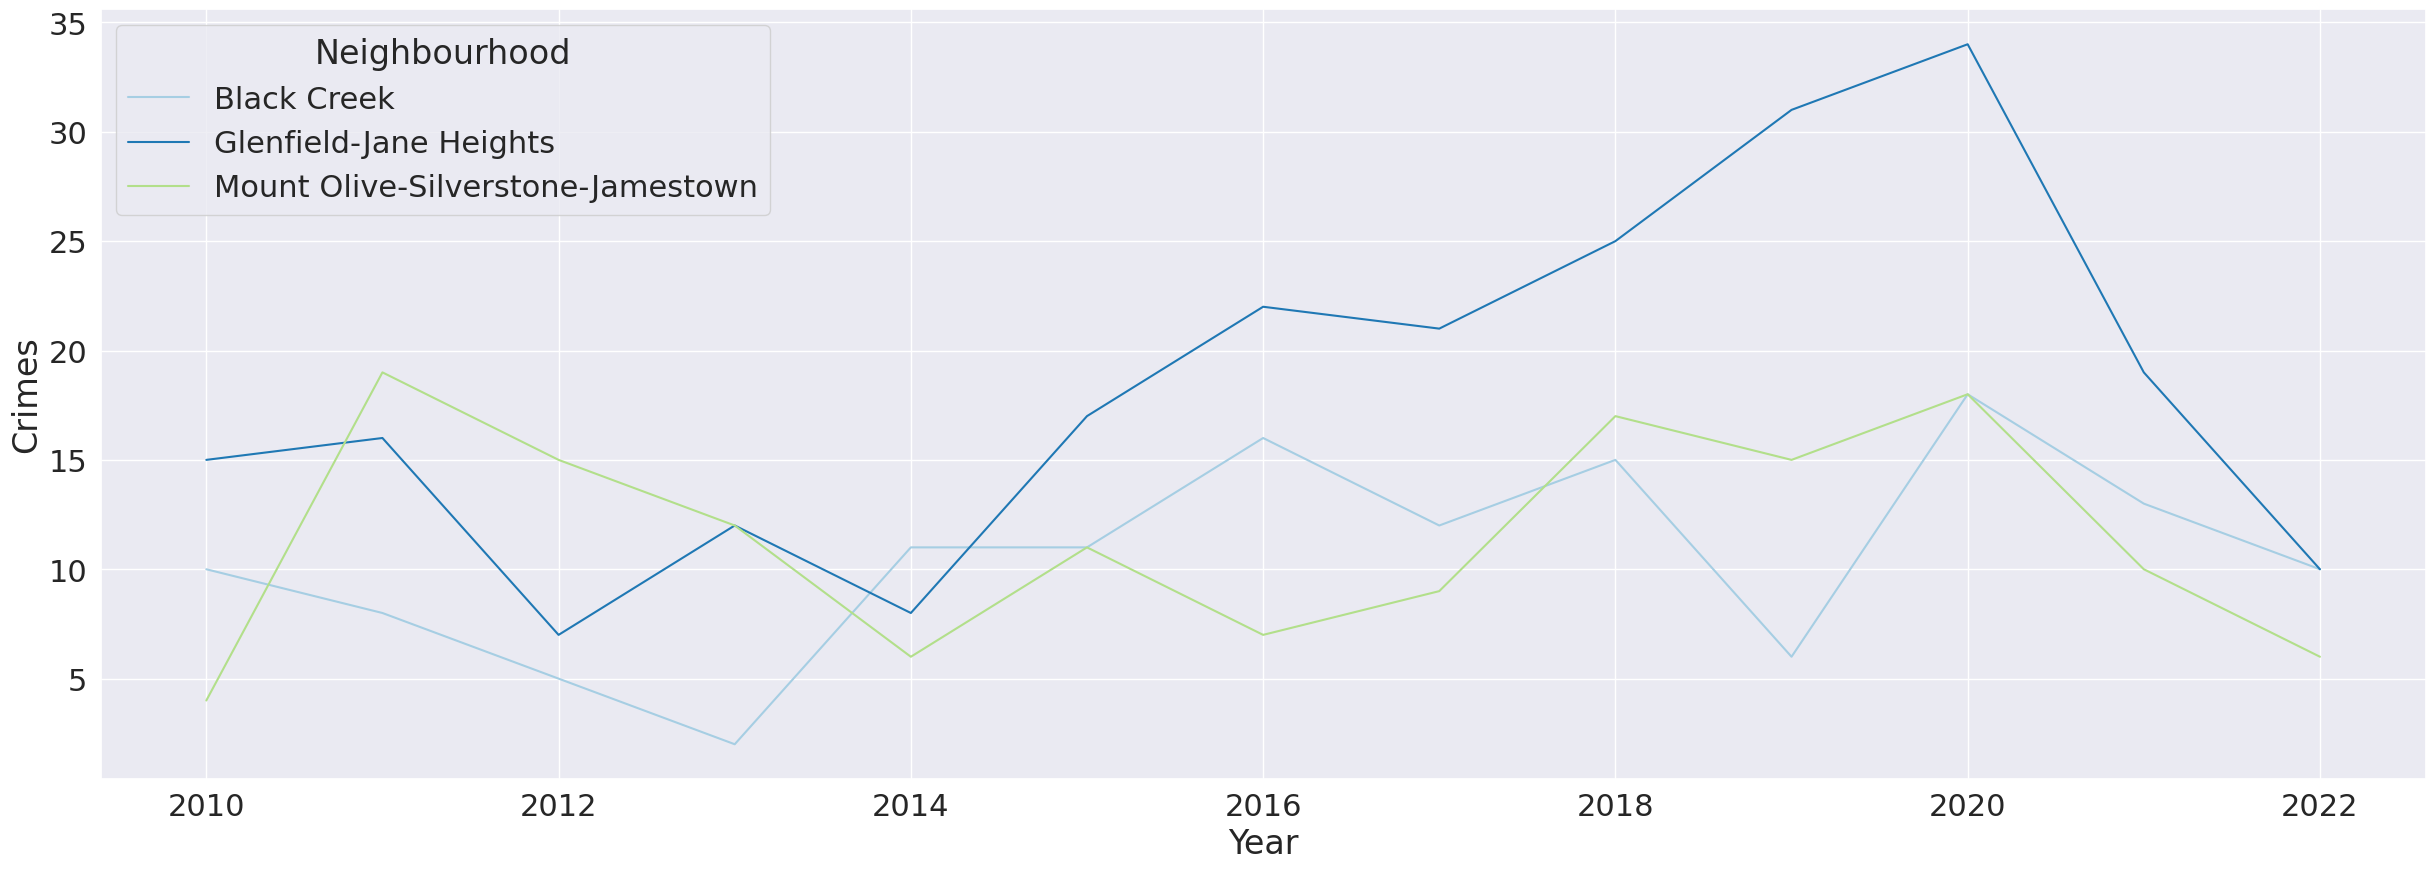

In [14]:
df_neighbourhood_year=df[['Neighbourhood', 'Year']].value_counts()
df_neighbourhood_year=df_neighbourhood_year.reset_index()
df_neighbourhood_year.columns=['Neighbourhood', 'Year', 'Crimes']
df_neighbourhood_year=df_neighbourhood_year.sort_values(by=['Neighbourhood'])
df_neighbourhood_year=df_neighbourhood_year[df_neighbourhood_year['Neighbourhood'].isin(['Glenfield-Jane Heights', 'Black Creek',
       'Mount Olive-Silverstone-Jamestown'])]
df_neighbourhood_year=df_neighbourhood_year[df_neighbourhood_year['Year']>=2010]
sns.set(font_scale=2)
plt.figure(figsize=(30, 10))
sns.lineplot(x='Year', y='Crimes', hue='Neighbourhood', data=df_neighbourhood_year, palette="Paired")
plt.savefig('neighbourhoods crime')

We can find out at what time of the day the crimes are usually occuring, either it is night, evening, afternoon, or morning, or we can also look for it based on days, weeks, and months. To find them out, we can analyze data generally or focus on one neighbourhood, like Glenfield-Jane Heights.

In [15]:
df_neighbourhood_year.head()

Neighbourhood  Year  Crimes
230   Black Creek  2019       6
790   Black Creek  2013       2
15    Black Creek  2016      16
20    Black Creek  2018      15
37    Black Creek  2017      12

In [16]:
df.head()

Year     Month  Weekdays  Day_of_the_month       Time Division  \
0  2004       May  Saturday                15      Night      D41   
1  2004      July    Monday                26    Evening      D23   
2  2004       May    Friday                14  Afternoon      D31   
3  2004  December    Sunday                19      Night      D51   
4  2004     April    Monday                12    Evening      D42   

   Number_of_Death  Number_of_Injuries           Neighbourhood  Longitude  \
0                0                   0            Woburn North -79.234955   
1                0                   0  West Humber-Clairville -79.618218   
2                1                   1             Black Creek -79.518759   
3                1                   0     Downtown Yonge East -79.378870   
4                0                   0            Malvern East -79.212435   

    Latitude       Date  
0  43.781528 2004-05-15  
1  43.733547 2004-07-26  
2  43.769157 2004-05-14  
3  43.660665 2004-12-19  
4  43.812075 2004-04-12

In [17]:
df_time=df[['Year', 'Month', 'Weekdays', 'Day_of_the_month', 'Time']].value_counts().to_frame()
df_time=df_time.reset_index()
df_time.columns=['Year', 'Month', 'Weekdays', 'Day_of_the_month', 'Time', 'Crimes']
df_year=df_time.groupby(['Year'])['Crimes'].sum().reset_index()
df_year.head()

Year  Crimes
0  2004     191
1  2005     262
2  2006     215
3  2007     207
4  2008     238

In [18]:
dict1 = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}
df_time["Month_Num"] = df_time["Month"].map(dict1)

In [19]:
df_time

Year      Month   Weekdays  Day_of_the_month       Time  Crimes  \
0     2019    October    Tuesday                 1    Evening       5   
1     2020      April  Wednesday                 8    Evening       5   
2     2019     August     Monday                 5      Night       5   
3     2020        May    Tuesday                19    Evening       5   
4     2005       July     Monday                25    Evening       5   
...    ...        ...        ...               ...        ...     ...   
4736  2012    January    Tuesday                31  Afternoon       1   
4737  2012    January  Wednesday                11    Evening       1   
4738  2012    January  Wednesday                18    Evening       1   
4739  2012       July     Monday                 2      Night       1   
4740  2022  September  Wednesday                28  Afternoon       1   

      Month_Num  
0            10  
1             4  
2             8  
3             5  
4             7  
...         ...  
4736          1  
4737          1  
4738          1  
4739          7  
4740          9  

[4741 rows x 7 columns]

<Axes: xlabel='Year', ylabel='Crimes'>

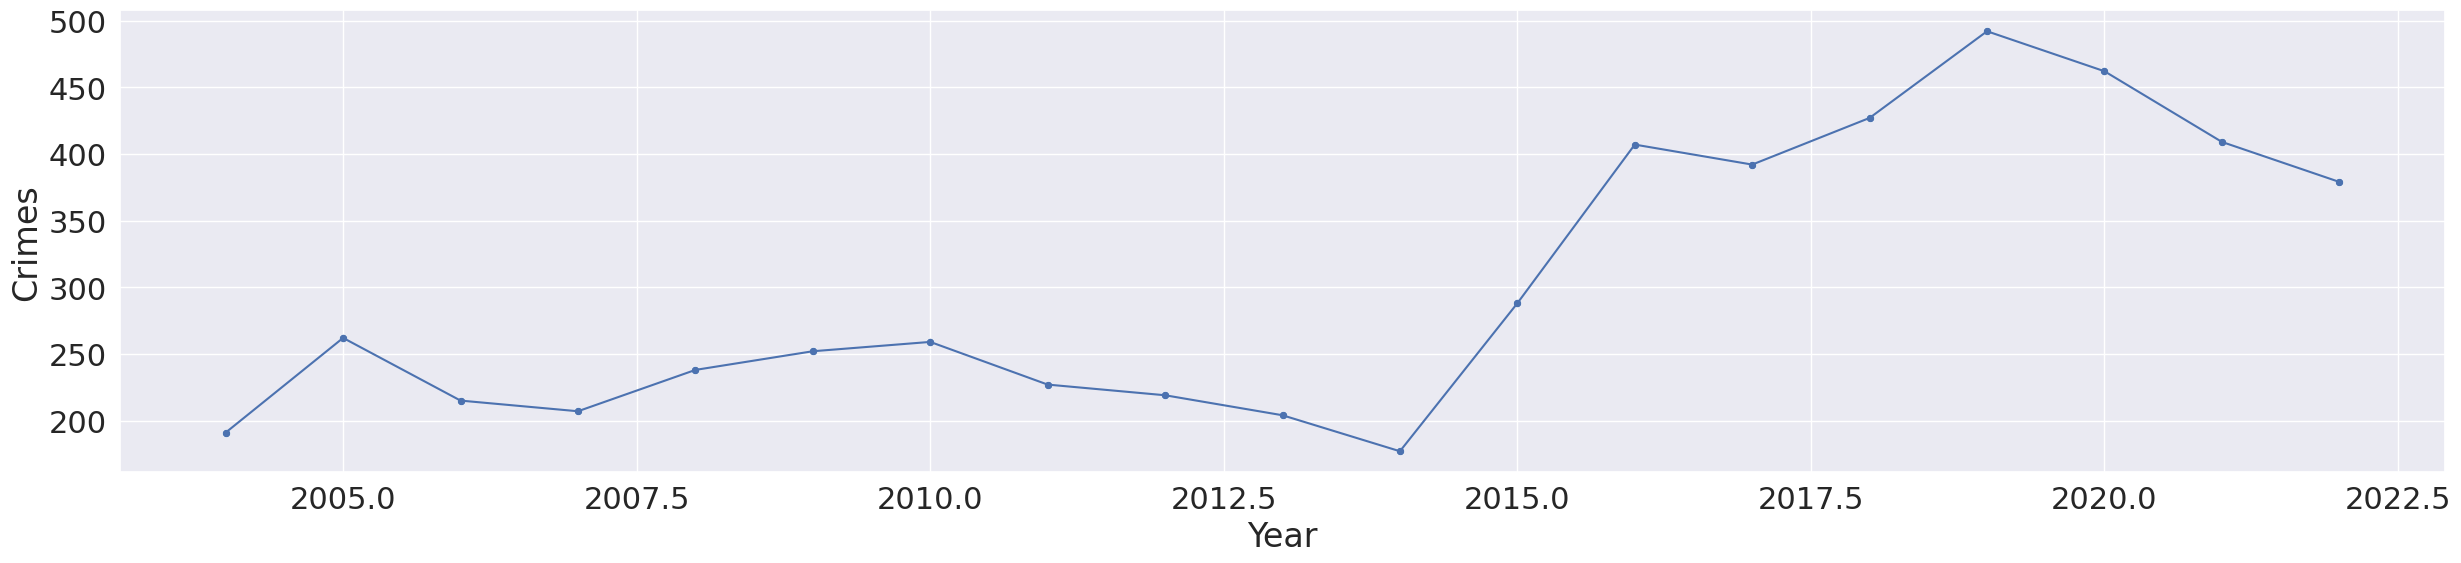

In [20]:
plt.figure(figsize=(30, 6))# figure size, width and height
sns.lineplot(x='Year', y='Crimes', data=df_year)
sns.scatterplot(x='Year', y='Crimes', data=df_year, markers='o')
#plt.ylabel('Crimes')
#plt.xlabel('Years')
#plt.xticks(rotation=45)
#plt.ticklabel_format(style='plain', axis='y')
#plt.show()

In [21]:
df_time.groupby("Month_Num")

In [22]:
df_month=df_time.sort_values("Month_Num").groupby(['Month_Num', 'Time'])['Crimes'].sum().reset_index()
df_month.head()

Month_Num       Time  Crimes
0          1  Afternoon      67
1          1    Evening     185
2          1    Morning      24
3          1      Night     164
4          2  Afternoon      55

<Axes: xlabel='Month_Num', ylabel='Crimes'>

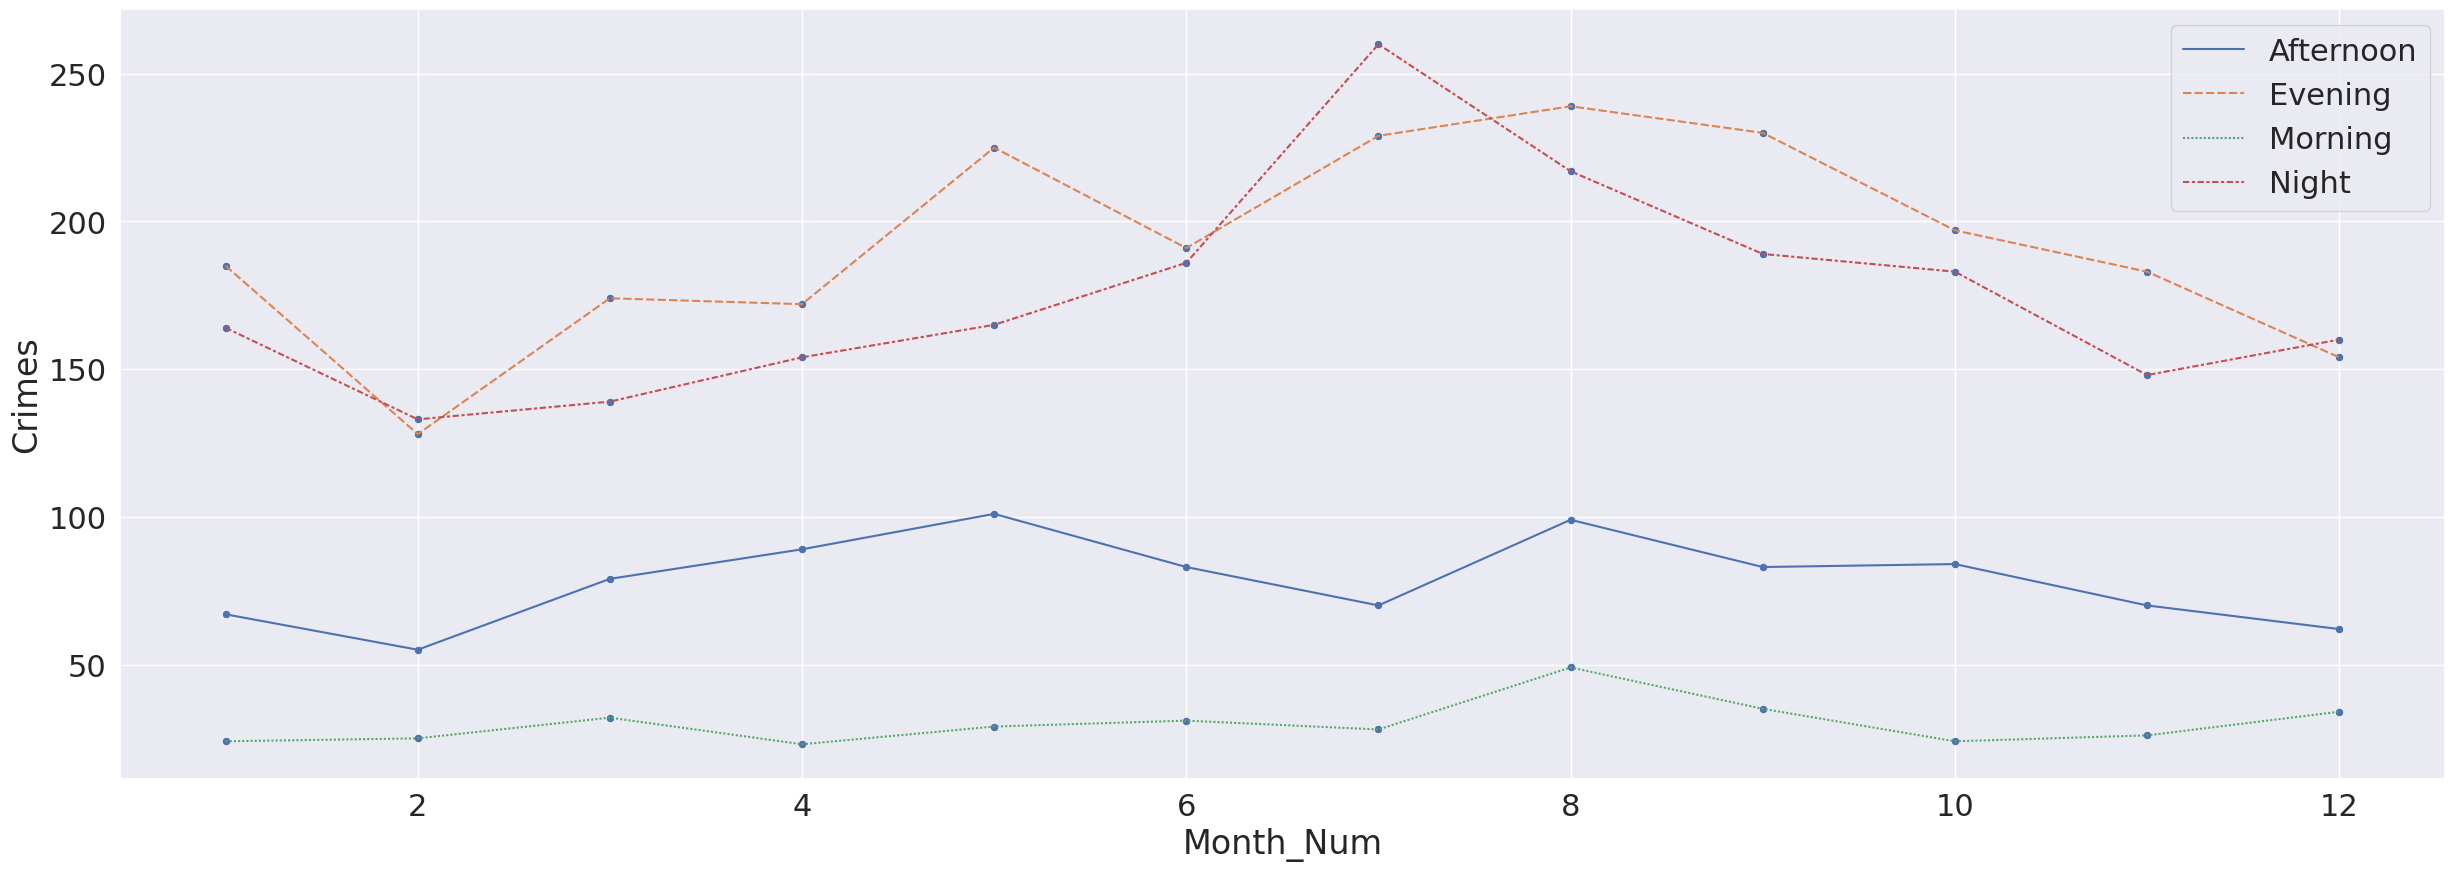

In [23]:
plt.figure(figsize=(30, 10))
sns.lineplot(x='Month_Num', y='Crimes', data=df_month, hue='Time', style='Time')
sns.scatterplot(x='Month_Num', y='Crimes', data=df_month)

<Axes: xlabel='Weekdays_num', ylabel='Crimes'>

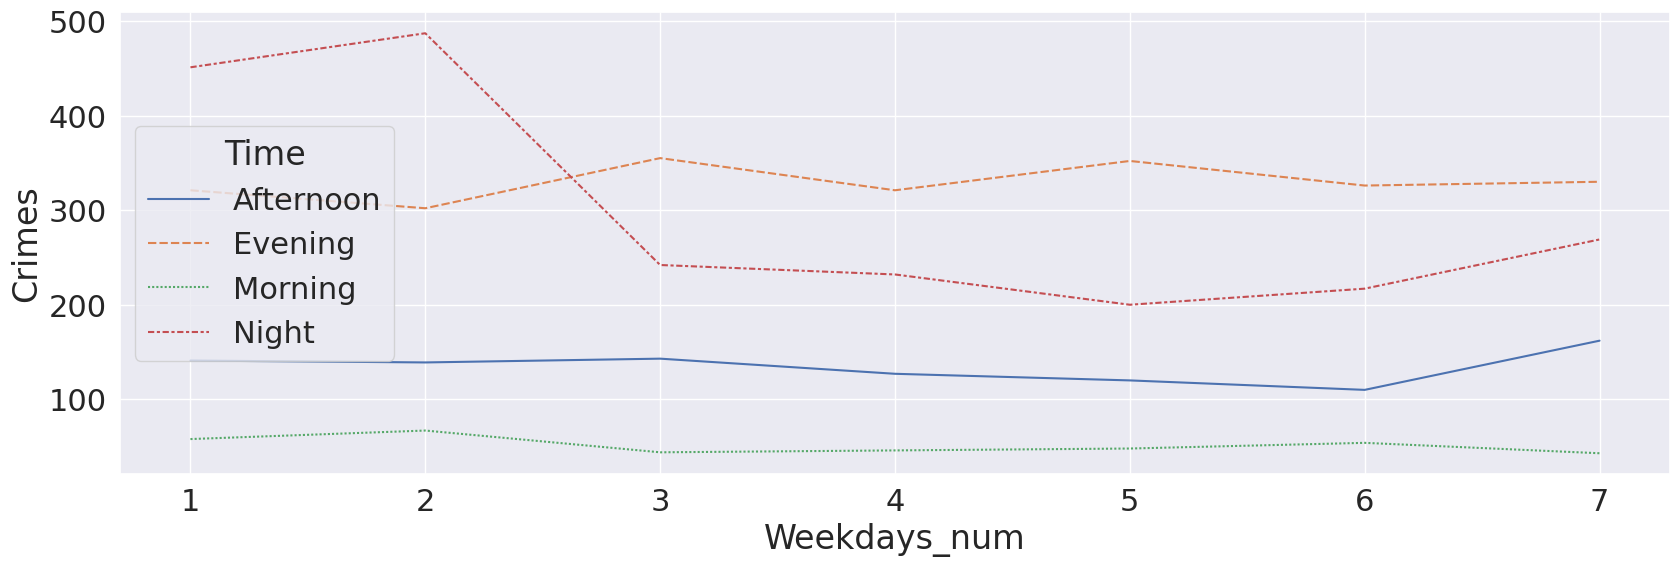

In [24]:
df_days=df_time.groupby(['Time', 'Weekdays'])['Crimes'].sum().reset_index()
dict2={'Saturday':1, 'Sunday': 2, 'Monday': 3, 'Tuesday': 4, 'Wednesday': 5, 'Thursday':6, 'Friday': 7}
df_days["Weekdays_num"] = df_days["Weekdays"].map(dict2)
plt.figure(figsize=(20, 6))
sns.lineplot(x='Weekdays_num', y='Crimes', data=df_days, hue='Time', style='Time')

<Axes: xlabel='Weekdays', ylabel='Crimes'>

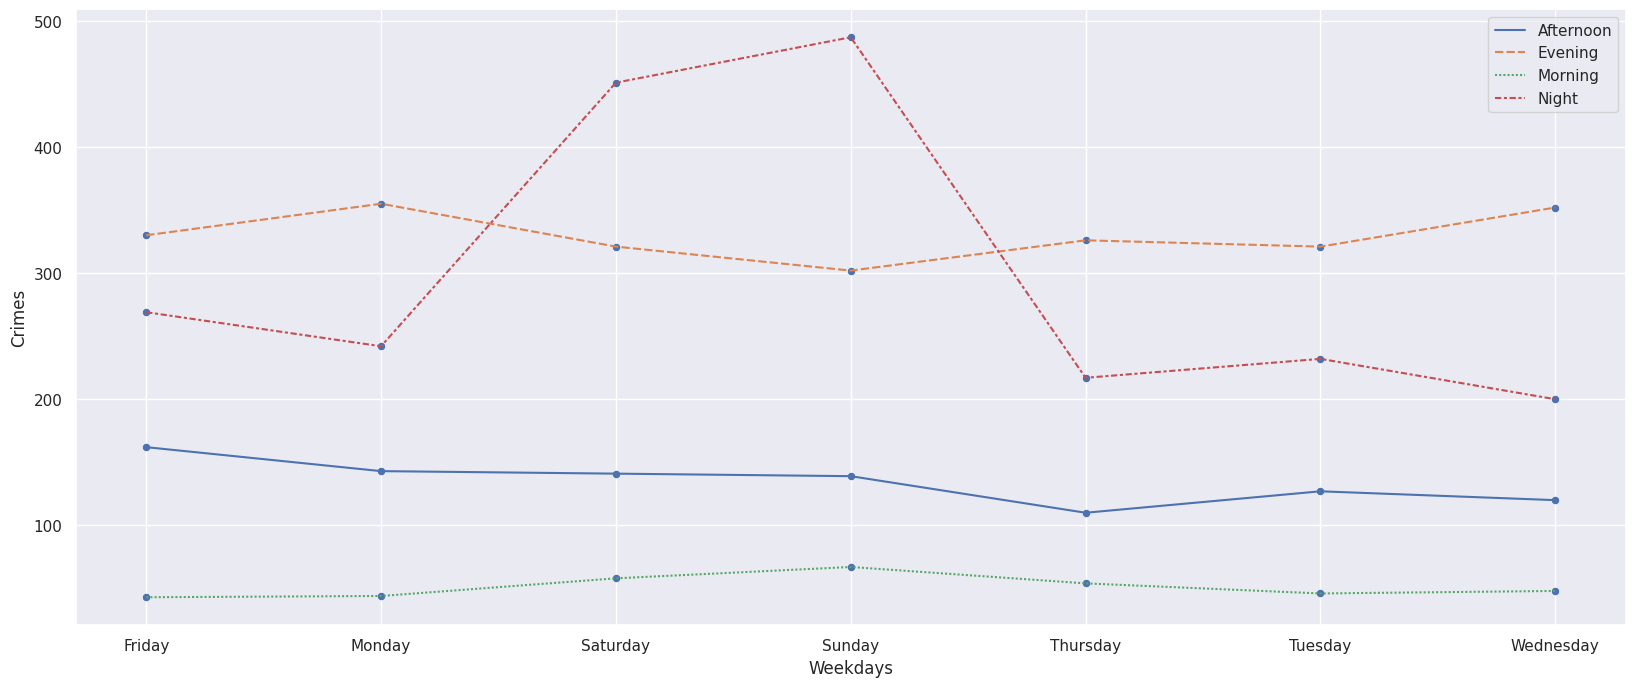

In [25]:

plt.figure(figsize=(20, 8))
sns.set(font_scale=1)
sns.lineplot(x='Weekdays', y='Crimes', data=df_days, hue='Time', style='Time')
sns.scatterplot(x='Weekdays', y='Crimes', data=df_days, marker='o')

In [26]:
import folium
from folium import plugins
longitude=-79.347015
latitude=43.651070

plt.figure(figsize=(20, 10))
toronto_map=folium.Map(location=[latitude, longitude], zoom_start=12)

crimes=plugins.MarkerCluster().add_to(toronto_map)

for lat, lng, label, in zip(df.Latitude, df.Longitude, df.Neighbourhood):
  folium.Marker(
      location=[lat, lng],
      icon=None,
      popup=label,
  ).add_to(crimes)

toronto_map

<Figure size 2000x1000 with 0 Axes>

In [27]:
toronto_map.save('toronto_map.html')

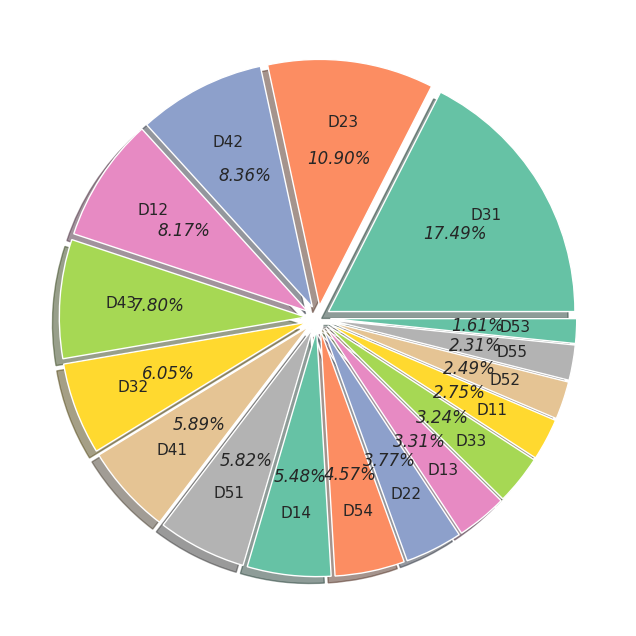

<Figure size 1500x1500 with 0 Axes>

In [28]:
#Crimes based on Divisions
division=df['Division'].value_counts().to_frame()
division=division.reset_index()
division.columns=['Division', 'Crimes']
plt.figure(figsize=(8,8))
patches, texts, autotexts=plt.pie(division.Crimes, labels=division.Division, explode=[0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05], shadow=True, autopct='%1.2f%%', colors=sns.color_palette('Set2'), labeldistance=0.75, pctdistance=0.6)
for text in texts:
  text.set_horizontalalignment('center')
plt.figure(figsize=(15,15))
for autotext in autotexts:
    autotext.set_horizontalalignment('center')
    autotext.set_fontstyle('italic')


plt.show()

In [29]:

df_death=df[['Year','Number_of_Death', 'Number_of_Injuries']]
##df_deaht=df_death.reset_index()
##df_death.columbs=['Year', 'Number_of_Death', 'Number_of_Injuries']
df_death.head()

Year  Number_of_Death  Number_of_Injuries
0  2004                0                   0
1  2004                0                   0
2  2004                1                   1
3  2004                1                   0
4  2004                0                   0

In [30]:
df_death_year=df_death.groupby(['Year'])['Number_of_Death', 'Number_of_Injuries'].sum().reset_index()
df_death_year.head()


Year  Number_of_Death  Number_of_Injuries
0  2004               26                  96
1  2005               53                 178
2  2006               29                 173
3  2007               44                 129
4  2008               37                 171

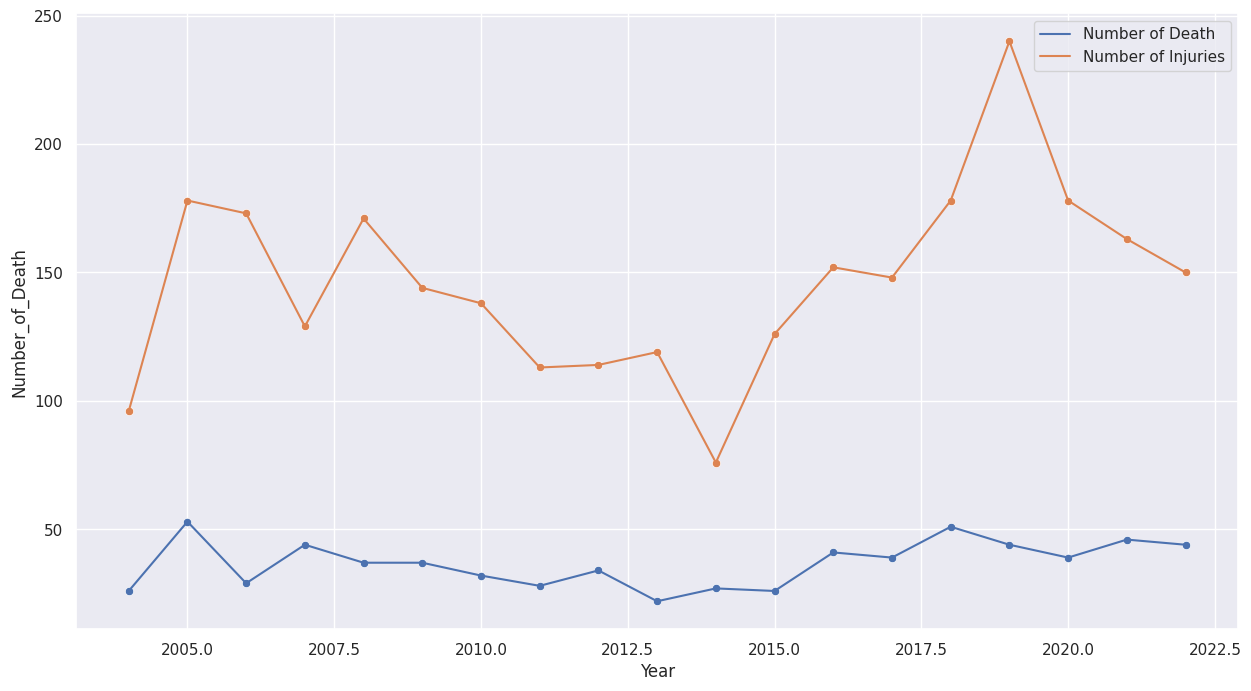

In [31]:
plt.figure(figsize=(15, 8))
sns.lineplot(y='Number_of_Death', x='Year', data=df_death_year, label='Number of Death')
sns.scatterplot(y='Number_of_Death', x='Year', data=df_death_year, marker='o')
sns.lineplot(y='Number_of_Injuries', x='Year', data=df_death_year, label='Number of Injuries')
sns.scatterplot(y='Number_of_Injuries', x='Year', data=df_death_year, marker='o')
plt.show()

In [32]:

#print(df_neighbourhood['Crimes'].average())
print('max: ', df_neighbourhood['Crimes'].max())
print('mean: ', df_neighbourhood['Crimes'].mean())
print('min: ', df_neighbourhood['Crimes'].min())

max:  311
mean:  35.893081761006286
min:  1


In [33]:
df_neighbourhood['Risk_level']=df_neighbourhood['Crimes'].apply(lambda x: 'low' if 0 < x < 50 else 'medium' if 50 <= x <150 else 'high')
df_neighbourhood.head()

Neighbourhood  Crimes Risk_level
0             Glenfield-Jane Heights     311       high
1                        Black Creek     203       high
2  Mount Olive-Silverstone-Jamestown     192       high
3             West Humber-Clairville     132     medium
4            York University Heights     117     medium

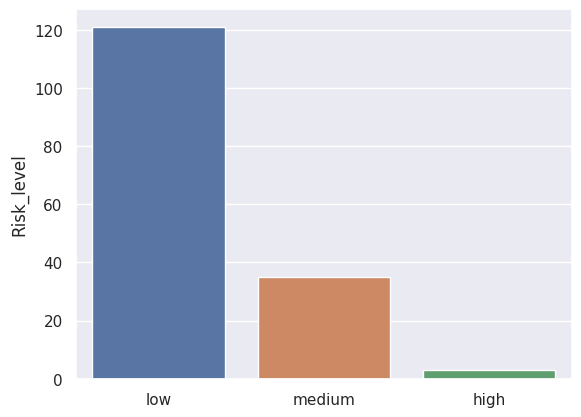

In [34]:
df_risk_level=df_neighbourhood['Risk_level'].value_counts().to_frame()
sns.barplot(y=df_risk_level.Risk_level, x=df_risk_level.index)
plt.show()


In [35]:
df.head()

Year     Month  Weekdays  Day_of_the_month       Time Division  \
0  2004       May  Saturday                15      Night      D41   
1  2004      July    Monday                26    Evening      D23   
2  2004       May    Friday                14  Afternoon      D31   
3  2004  December    Sunday                19      Night      D51   
4  2004     April    Monday                12    Evening      D42   

   Number_of_Death  Number_of_Injuries           Neighbourhood  Longitude  \
0                0                   0            Woburn North -79.234955   
1                0                   0  West Humber-Clairville -79.618218   
2                1                   1             Black Creek -79.518759   
3                1                   0     Downtown Yonge East -79.378870   
4                0                   0            Malvern East -79.212435   

    Latitude       Date  
0  43.781528 2004-05-15  
1  43.733547 2004-07-26  
2  43.769157 2004-05-14  
3  43.660665 2004-12-19  
4  43.812075 2004-04-12

## Time Series Prediction Based on Neighbourhoods

In [36]:
#Calculating the number of crimes on daily basis in each neighbourhood
df_crimes=df[['Year', 'Month', 'Weekdays', 'Day_of_the_month', 'Time', 'Division','Number_of_Death', 'Number_of_Injuries', 'Neighbourhood', 'Longitude','Latitude', 'Date']].value_counts().to_frame()
df_crimes=df_crimes.reset_index()
df_crimes.columns=['Year', 'Month', 'Weekdays', 'Day_of_the_month', 'Time', 'Division','Number_of_Death', 'Number_of_Injuries', 'Neighbourhood', 'Longitude','Latitude', 'Date', 'Crimes']
df_crimes.head()



Year    Month  Weekdays  Day_of_the_month       Time Division  \
0  2007   August  Saturday                 4    Morning      D51   
1  2008      May  Thursday                 1  Afternoon      D41   
2  2008  January  Thursday                17    Evening      D31   
3  2007  January  Saturday                13    Evening      D54   
4  2013   August    Sunday                 4      Night      D52   

   Number_of_Death  Number_of_Injuries           Neighbourhood  Longitude  \
0                0                   1             Regent Park -79.362998   
1                0                   1             Dorset Park -79.284833   
2                0                   1  Glenfield-Jane Heights -79.515125   
3                0                   0                     NSA -85.488744   
4                0                   0        Wellington Place -79.395278   

    Latitude       Date  Crimes  
0  43.660081 2007-08-04       2  
1  43.747513 2008-05-01       2  
2  43.747088 2008-01-17       2  
3   0.000000 2007-01-13       2  
4  43.648443 2013-08-04       2

In [37]:
# Selecting the Neighbourhood
df_neighbourhood_1=df_crimes[df_crimes['Neighbourhood']=='Glenfield-Jane Heights']
df_neighbourhood_1.head()

Year    Month  Weekdays  Day_of_the_month       Time Division  \
2   2008  January  Thursday                17    Evening      D31   
27  2018    March  Thursday                22    Evening      D31   
45  2018      May    Monday                21    Evening      D31   
48  2018      May    Monday                21  Afternoon      D31   
55  2018     June  Saturday                30  Afternoon      D31   

    Number_of_Death  Number_of_Injuries           Neighbourhood  Longitude  \
2                 0                   1  Glenfield-Jane Heights -79.515125   
27                0                   0  Glenfield-Jane Heights -79.506882   
45                0                   0  Glenfield-Jane Heights -79.510446   
48                0                   1  Glenfield-Jane Heights -79.513682   
55                0                   0  Glenfield-Jane Heights -79.509677   

     Latitude       Date  Crimes  
2   43.747088 2008-01-17       2  
27  43.740318 2018-03-22       1  
45  43.749221 2018-05-21       1  
48  43.741234 2018-05-21       1  
55  43.739667 2018-06-30       1

## Feature Engineering

In [39]:
# Getting dummies of categorical variables
features=df_neighbourhood_1.drop(['Year', 'Division', 'Neighbourhood', 'Longitude','Latitude', 'Date', 'Crimes'], axis=1)
features=pd.get_dummies(data=features)
features.head()

Day_of_the_month  Number_of_Death  Number_of_Injuries  Month_April  \
2                 17                0                   1            0   
27                22                0                   0            0   
45                21                0                   0            0   
48                21                0                   1            0   
55                30                0                   0            0   

    Month_August  Month_December  Month_February  Month_January  Month_July  \
2              0               0               0              1           0   
27             0               0               0              0           0   
45             0               0               0              0           0   
48             0               0               0              0           0   
55             0               0               0              0           0   

    Month_June  Month_March  Month_May  Month_November  Month_October  \
2            0            0          0               0              0   
27           0            1          0               0              0   
45           0            0          1               0              0   
48           0            0          1               0              0   
55           1            0          0               0              0   

    Month_September  Weekdays_Friday  Weekdays_Monday  Weekdays_Saturday  \
2                 0                0                0                  0   
27                0                0                0                  0   
45                0                0                1                  0   
48                0                0                1                  0   
55                0                0                0                  1   

    Weekdays_Sunday  Weekdays_Thursday  Weekdays_Tuesday  Weekdays_Wednesday  \
2                 0                  1                 0                   0   
27                0                  1                 0                   0   
45                0                  0                 0                   0   
48                0                  0                 0                   0   
55                0                  0                 0                   0   

    Time_Afternoon  Time_Evening  Time_Morning  Time_Night  
2                0             1             0           0  
27               0             1             0           0  
45               0             1             0           0  
48               1             0             0           0  
55               1             0             0           0

In [40]:
X=features
y=df_neighbourhood_1['Crimes']


In [41]:
print(X.shape, y.shape)

(310, 26) (310,)


In [42]:
#Spliting the data into train and test
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.2, random_state=0)

In [43]:
#fit and predict the dataset
model=LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

0.01009470658299743

In [44]:
preds=pd.DataFrame(y_pred, columns=['y_pred'])
y_test_2=pd.DataFrame(y_test, columns=['Crimes'])



## Time Series Analysis using FBprophet

In [45]:
#!pip install --upgrade pip

In [46]:
##from fbprophet import Prophet
import prophet
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from sklearn.metrics import mean_squared_error
from numpy import sqrt

In [87]:
#Creating a function to groupby the number of crimes on daily, weekly, monthly, and annually bases.
def select_series(data, time_period='day', crimes='Crimes'):
    time_periods = {
        'day': 'D',
        'week': 'W',
        'month': 'M',
        'year': 'Y'}

    data = data.set_index('Date')
    data = data['Crimes'].resample(time_periods[time_period]).sum()
    data = pd.DataFrame(data).reset_index()
    return data

daily_crimes=select_series(df_neighbourhood_1, time_period='day')
daily_crimes.columns=['ds', 'y']
daily_crimes.ds=pd.to_datetime(daily_crimes['ds'])
daily_crimes.sort_values('ds')
daily_crimes.head(5)

ds  y
0 2004-04-15  1
1 2004-04-16  0
2 2004-04-17  0
3 2004-04-18  0
4 2004-04-19  0

In [88]:
train_df=daily_crimes[:int(daily_crimes.shape[0]*0.80)]
test_df=daily_crimes[int(daily_crimes.shape[0]*0.80):]
print(train_df.shape)
print(test_df.shape)

(5399, 2)
(1350, 2)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhve8b2j/yrpa5g2i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhve8b2j/m2j8ep_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6186', 'data', 'file=/tmp/tmpxhve8b2j/yrpa5g2i.json', 'init=/tmp/tmpxhve8b2j/m2j8ep_4.json', 'output', 'file=/tmp/tmpxhve8b2j/prophet_modeld76245di/prophet_model-20230723171656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:16:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:16:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


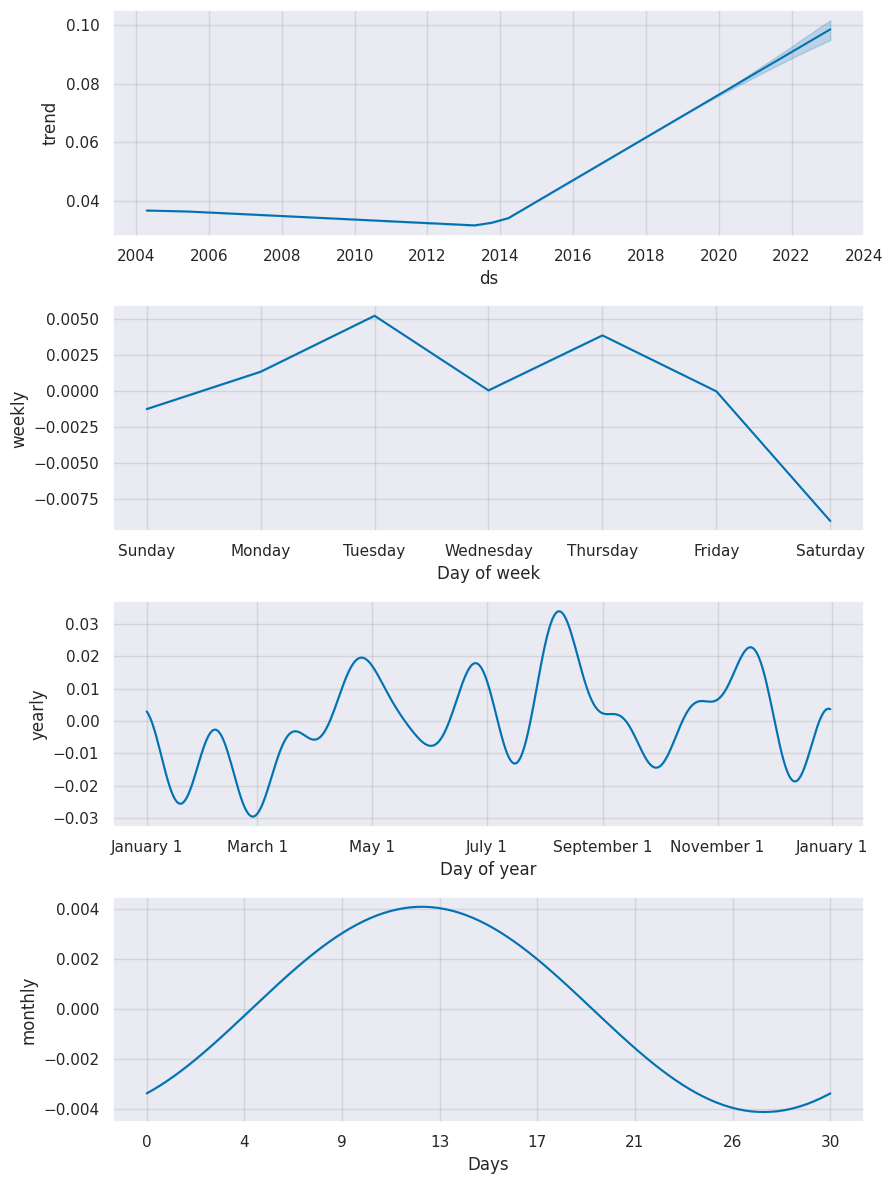

In [89]:
#training the model on training set
model_fb=Prophet(growth='linear')
model_fb.add_seasonality( name='monthly', period=30, fourier_order=1)
model_fb.fit(train_df)
future=model_fb.make_future_dataframe(periods=1460, freq='D')
forecast=model_fb.predict(future)
# ploting model components
model_fb.plot_components(forecast)
plt.show()


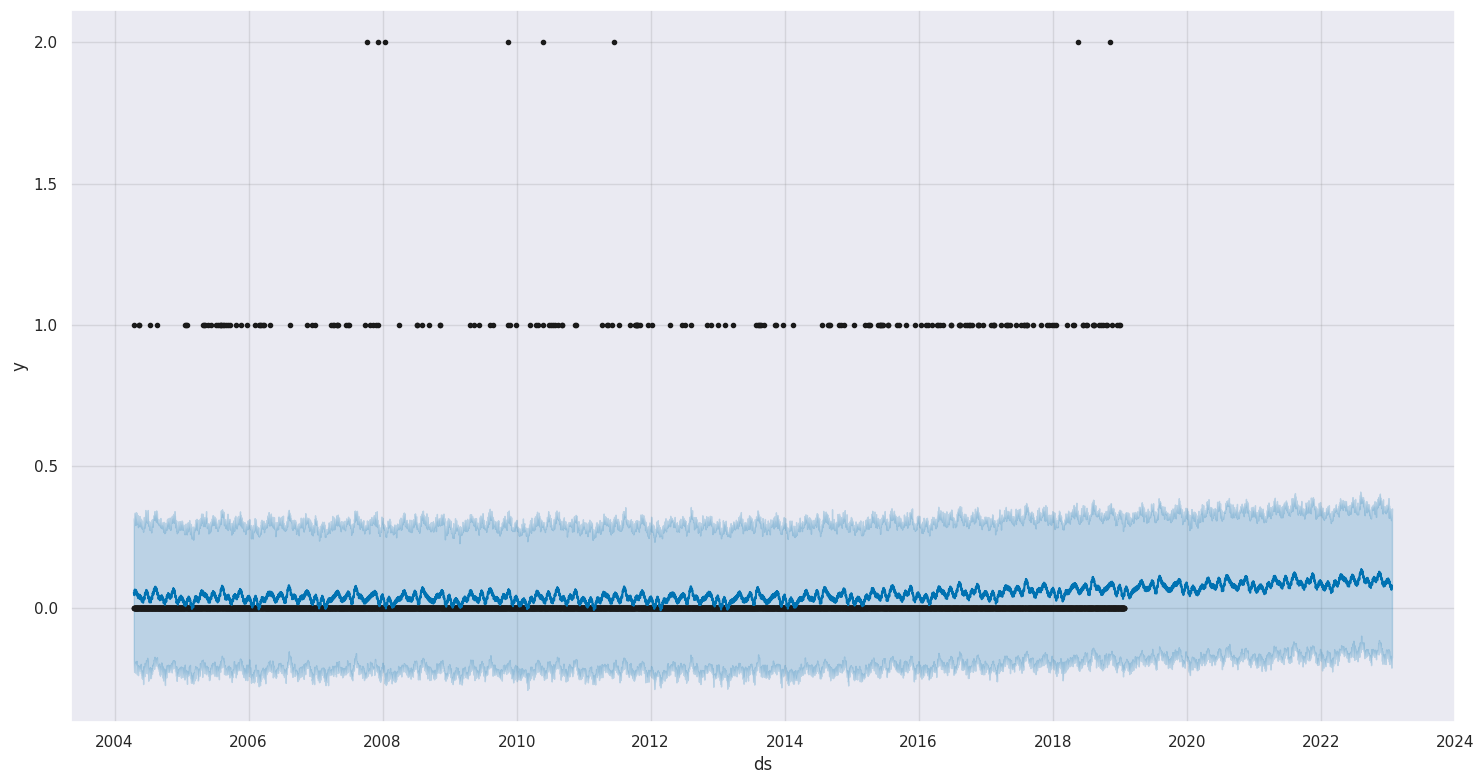

In [90]:
# Plot the forecast with the actuals
f, ax=plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(15)

fig=model_fb.plot(forecast, ax=ax)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhve8b2j/pk1eflzp.json


(5438, 2)
(1360, 2)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhve8b2j/70x1nnau.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88246', 'data', 'file=/tmp/tmpxhve8b2j/pk1eflzp.json', 'init=/tmp/tmpxhve8b2j/70x1nnau.json', 'output', 'file=/tmp/tmpxhve8b2j/prophet_modelwv8yt8j3/prophet_model-20230723171714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:17:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:17:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


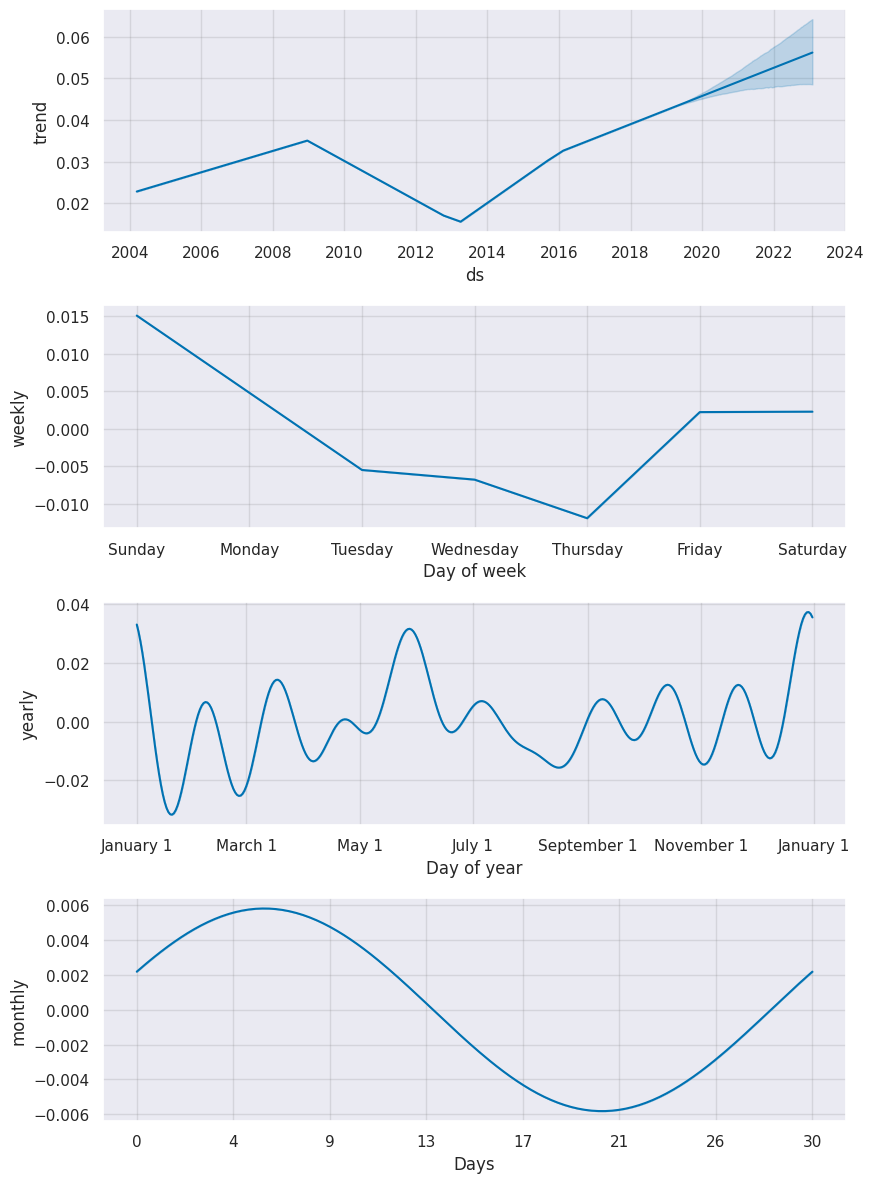

In [91]:
# Selecting the Neighbourhood
df_neighbourhood_2=df_crimes[df_crimes['Neighbourhood']=='Black Creek']

daily_crimes=select_series(df_neighbourhood_2, time_period='day')
daily_crimes.columns=['ds', 'y']
daily_crimes.ds=pd.to_datetime(daily_crimes['ds'])
daily_crimes.sort_values('ds')


#Training the model
train_df=daily_crimes[:int(daily_crimes.shape[0]*0.80)]
test_df=daily_crimes[int(daily_crimes.shape[0]*0.80):]
print(train_df.shape)
print(test_df.shape)

#training the model on training set
model_fb=Prophet(growth='linear')
model_fb.add_seasonality( name='monthly', period=30, fourier_order=1)
model_fb.fit(train_df)
future=model_fb.make_future_dataframe(periods=1460, freq='D')
forecast=model_fb.predict(future)
# ploting model components
model_fb.plot_components(forecast)
plt.show()


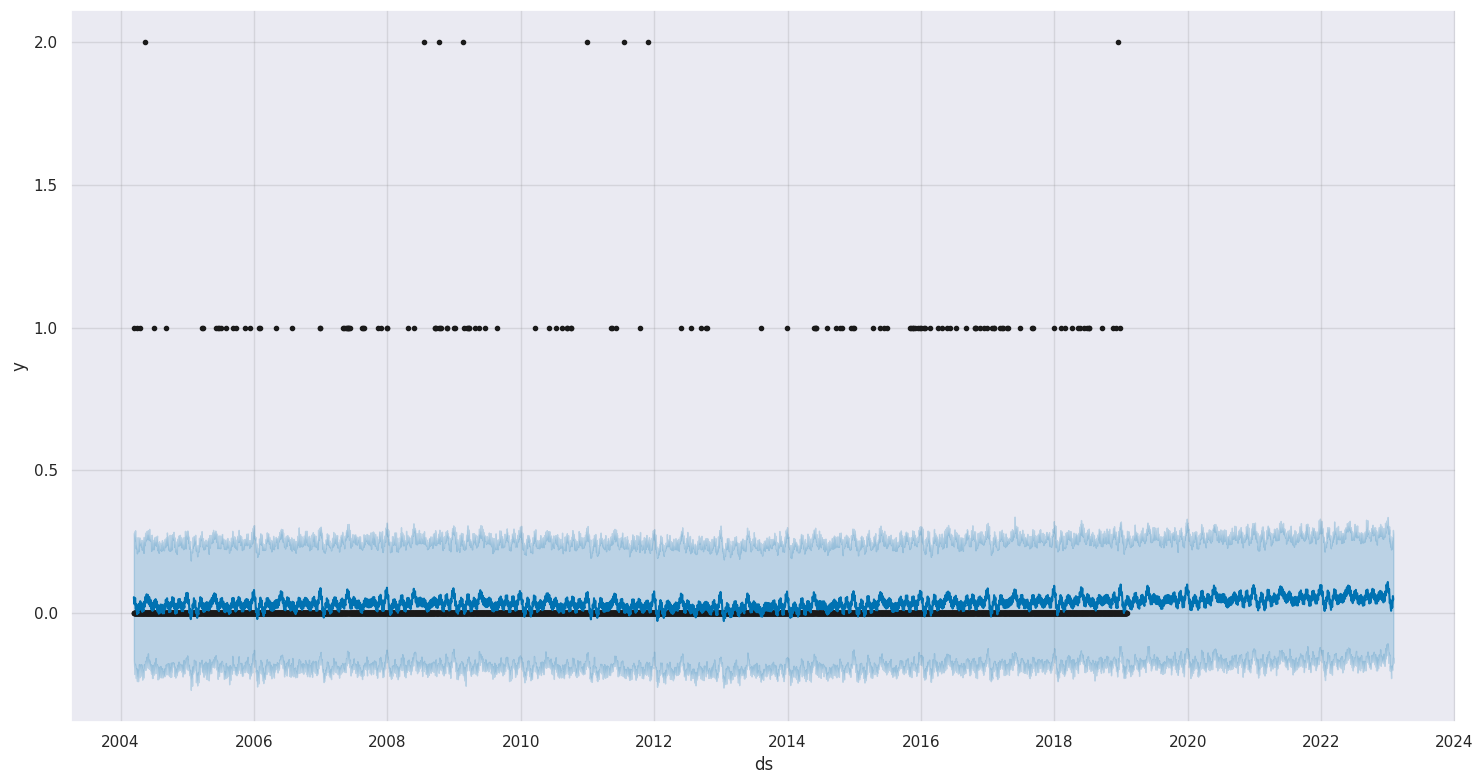

In [95]:
f, ax=plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(15)

fig=model_fb.plot(forecast, ax=ax)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhve8b2j/9jbosh0i.json


(5345, 2)
(1337, 2)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhve8b2j/owzpyyvn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49030', 'data', 'file=/tmp/tmpxhve8b2j/9jbosh0i.json', 'init=/tmp/tmpxhve8b2j/owzpyyvn.json', 'output', 'file=/tmp/tmpxhve8b2j/prophet_modelunfv4ezl/prophet_model-20230723170207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:02:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:02:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


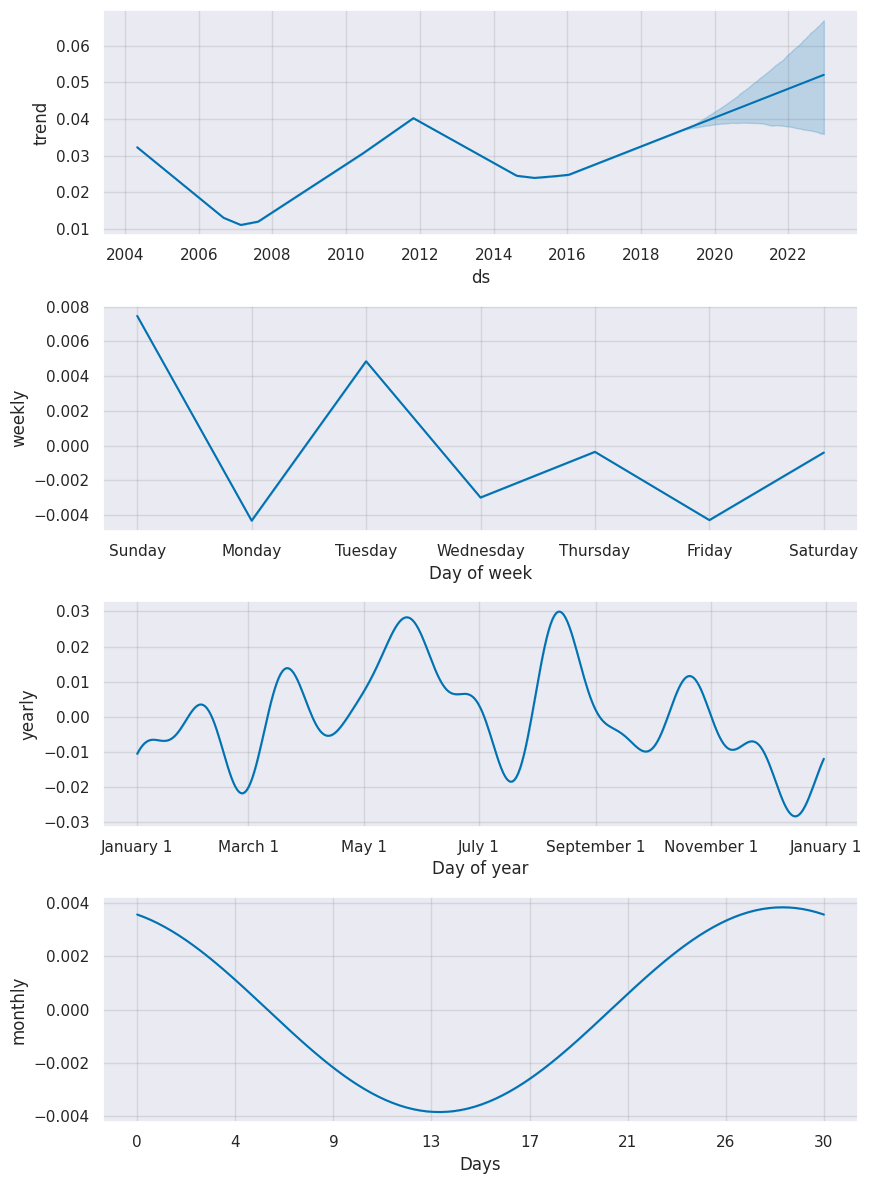

In [86]:
# Selecting the Neighbourhood
df_neighbourhood_3=df_crimes[df_crimes['Neighbourhood']=='Mount Olive-Silverstone-Jamestown']
df_neighbourhood_3.head()
daily_crimes=select_series(df_neighbourhood_3, time_period='day')
daily_crimes.columns=['ds', 'y']
daily_crimes.ds=pd.to_datetime(daily_crimes['ds'])
daily_crimes.sort_values('ds')


#Training the model
train_df=daily_crimes[:int(daily_crimes.shape[0]*0.80)]
test_df=daily_crimes[int(daily_crimes.shape[0]*0.80):]
print(train_df.shape)
print(test_df.shape)

#training the model on training set
model_fb=Prophet(growth='linear')
model_fb.add_seasonality( name='monthly', period=30, fourier_order=1)
model_fb.fit(train_df)
future=model_fb.make_future_dataframe(periods=1460, freq='D')
forecast=model_fb.predict(future)
# ploting model components
model_fb.plot_components(forecast)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhve8b2j/zav6yuoq.json


(5460, 2)
(1366, 2)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhve8b2j/72psqau5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18722', 'data', 'file=/tmp/tmpxhve8b2j/zav6yuoq.json', 'init=/tmp/tmpxhve8b2j/72psqau5.json', 'output', 'file=/tmp/tmpxhve8b2j/prophet_modelyso3sfr9/prophet_model-20230723172049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:20:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:20:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


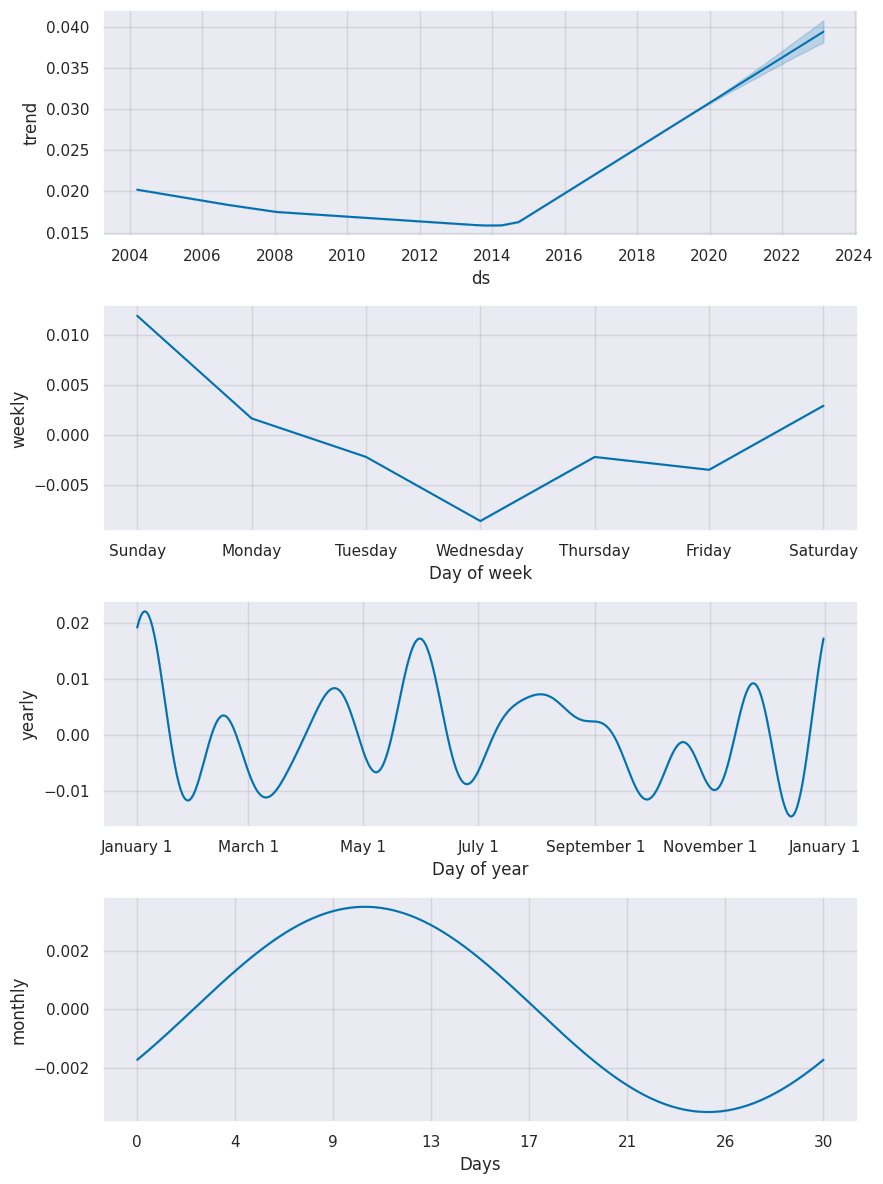

In [96]:
# Selecting the Neighbourhood
df_neighbourhood_4=df_crimes[df_crimes['Neighbourhood']=='West Humber-Clairville']
daily_crimes=select_series(df_neighbourhood_4, time_period='day')
daily_crimes.columns=['ds', 'y']
daily_crimes.ds=pd.to_datetime(daily_crimes['ds'])
daily_crimes.sort_values('ds')


#Training the model
train_df=daily_crimes[:int(daily_crimes.shape[0]*0.80)]
test_df=daily_crimes[int(daily_crimes.shape[0]*0.80):]
print(train_df.shape)
print(test_df.shape)

#training the model on training set
model_fb=Prophet(growth='linear')
model_fb.add_seasonality( name='monthly', period=30, fourier_order=1)
model_fb.fit(train_df)
future=model_fb.make_future_dataframe(periods=1460, freq='D')
forecast=model_fb.predict(future)
# ploting model components
model_fb.plot_components(forecast)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhve8b2j/qe2ra8wu.json


(5415, 2)
(1354, 2)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhve8b2j/5r3dq32r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82545', 'data', 'file=/tmp/tmpxhve8b2j/qe2ra8wu.json', 'init=/tmp/tmpxhve8b2j/5r3dq32r.json', 'output', 'file=/tmp/tmpxhve8b2j/prophet_modelg52c9r8s/prophet_model-20230723172931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:29:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:29:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


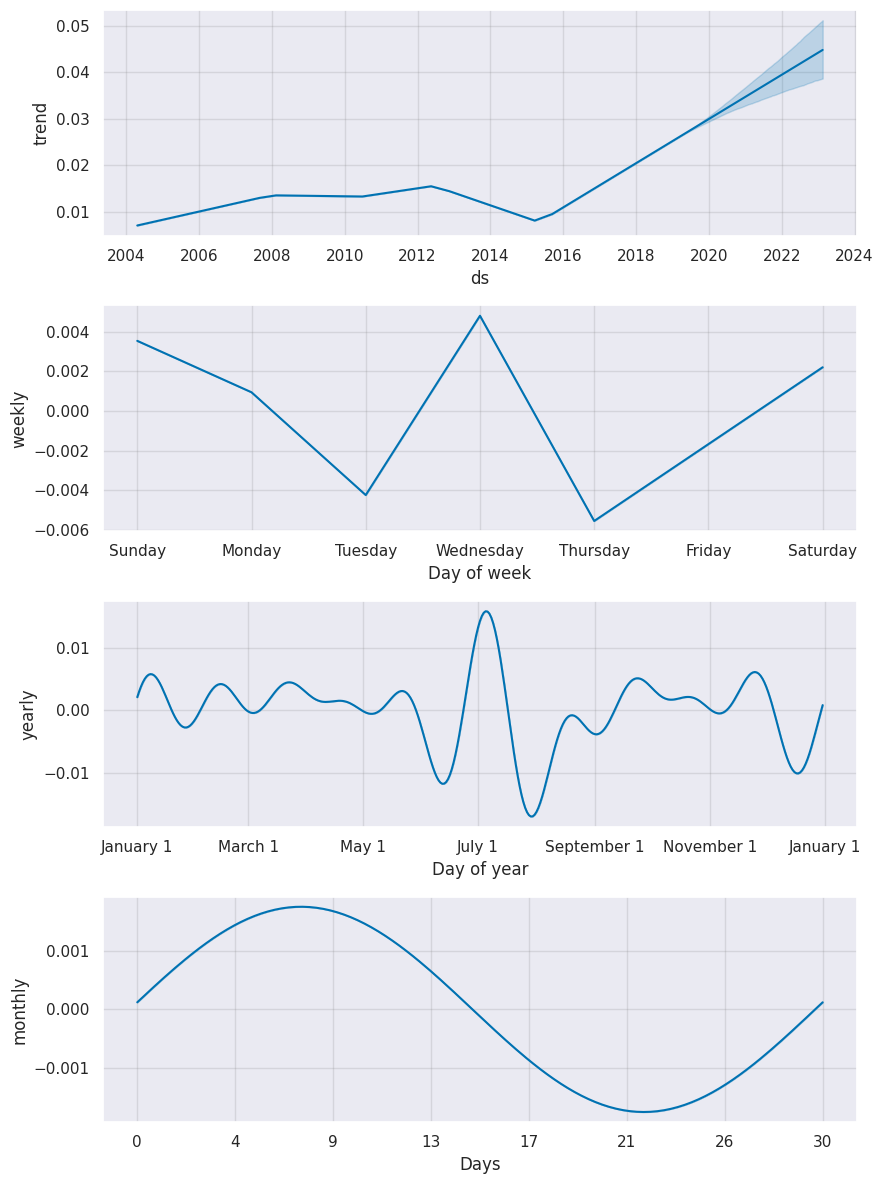

In [97]:
# Selecting the Neighbourhood
df_neighbourhood_5=df_crimes[df_crimes['Neighbourhood']=='York University Heights']
daily_crimes=select_series(df_neighbourhood_5, time_period='day')
daily_crimes.columns=['ds', 'y']
daily_crimes.ds=pd.to_datetime(daily_crimes['ds'])
daily_crimes.sort_values('ds')

#Training the model
train_df=daily_crimes[:int(daily_crimes.shape[0]*0.80)]
test_df=daily_crimes[int(daily_crimes.shape[0]*0.80):]
print(train_df.shape)
print(test_df.shape)

#training the model on training set
model_fb=Prophet(growth='linear')
model_fb.add_seasonality( name='monthly', period=30, fourier_order=1)
model_fb.fit(train_df)
future=model_fb.make_future_dataframe(periods=1460, freq='D')
forecast=model_fb.predict(future)
# ploting model components
model_fb.plot_components(forecast)
plt.show()